In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter
import seaborn as sns

print("Pandas version: {}".format(pd.__version__))
print("NumPy version: {}".format(np.__version__))

Pandas version: 2.2.3
NumPy version: 2.1.1


In [47]:
result_dir = "../results/pcap"
fig_dir = "./figures"
exporters = ["argus", "cicflowmeter", "go-flows", "nfstream", "nprobe", "zeek", "joy", "kitsune", "rustiflow"] # , "ntlflowlyzer"

In [3]:
df_all = pd.DataFrame()
for exporter in exporters:
    df = pd.read_csv(f"{result_dir}/{exporter}/summary_metrics.csv")
    df_all = pd.concat([df_all, df])

In [4]:
df_all

,DateTime,Extractor,Folder,PCAP File,Runtime (s),Avg_CPU_Usage (%),Avg_Memory_Usage (MB),Max_Memory_Usage (MB),CPU Cores,CPU Logical Cores,Total Memory (MB),Available Memory (MB)
0,2024-10-09 15:20:18,argus,/data/monday,sample_100k,0.634853,0.000000,29.078125,29.078125,16,32,48236.550781,45167.820312
1,2024-10-09 15:20:19,argus,/data/monday,sample_500k,1.247535,0.000000,23.869141,43.976562,16,32,48236.550781,45164.605469
2,2024-10-09 15:20:20,argus,/data/monday,sample_1M,2.132355,43.166667,70.697917,161.312500,16,32,48236.550781,45165.671875
3,2024-10-09 15:20:22,argus,/data/monday,sample_2M,4.514567,57.320000,108.834375,166.218750,16,32,48236.550781,45163.929688
4,2024-10-09 15:20:27,argus,/data/monday,sample_4M,20.193884,45.935000,164.558398,198.921875,16,32,48236.550781,45164.027344
...,...,...,...,...,...,...,...,...,...,...,...,...
10,2025-02-03 13:55:55,kitsune,/data/thursday,sample_500k,1068.287506,99.429896,125.935785,827.968750,16,32,48228.437500,45154.074219
11,2025-02-03 14:13:43,kitsune,/data/thursday,sample_1M,2237.869337,99.282302,140.576591,1506.023438,16,32,48228.437500,45163.375000
12,2025-02-03 14:51:01,kitsune,/data/friday,sample_100k,150.217042,100.126846,100.448668,300.257812,16,32,48228.437500,45161.312500
13,2025-02-03 14:53:31,kitsune,/data/friday,sample_500k,1046.289009,99.453185,133.548247,747.773438,16,32,48228.437500,45163.132812


In [5]:
df_all.groupby(['Extractor', 'PCAP File'])[['Runtime (s)', 'Avg_CPU_Usage (%)', 'Max_Memory_Usage (MB)']].agg(['mean', 'std'])

Runtime (s)              Avg_CPU_Usage (%)  \
                                 mean          std              mean   
Extractor    PCAP File                                                 
argus        cicids2017    189.755957     7.130473        137.173008   
             sample_100k     0.700872     0.069395          0.000000   
             sample_1M       4.544342     1.351741         40.727333   
             sample_2M       8.822807     2.424659         43.695636   
             sample_4M      20.400195     0.542140         48.098429   
             sample_500k     2.385708     0.678996         14.460000   
             sample_8M      39.411879     2.713957         82.691980   
cicflowmeter sample_100k     2.935835     0.292685        209.723333   
             sample_1M      23.857144     1.165382        849.499155   
             sample_2M      56.042343     2.055212       1149.626368   
             sample_4M     141.923291     5.677512       1373.552420   
             sample_500k    10.806304     0.679016        520.645485   
             sample_8M     313.408652    28.748464       1397.256301   
go-flows     cicids2017    133.427693    22.599793        209.775168   
             sample_100k     0.284776     0.103093          0.000000   
             sample_1M       4.336168     0.415395         73.356000   
             sample_2M       8.844193     0.503212         77.659556   
             sample_4M      18.177744     1.181960         82.552860   
             sample_500k     1.918446     0.314191         62.200000   
             sample_8M      32.211089     3.450374        107.938300   
joy          cicids2017    194.497823    18.924253         80.456219   
             sample_100k     0.352456     0.056988          0.000000   
             sample_1M       4.562698     0.157459         38.160000   
             sample_2M       9.125884     0.431809         40.381111   
             sample_4M      18.988736     0.742847         43.050877   
             sample_500k     2.128152     0.172919         29.256667   
             sample_8M      39.357889     3.203028         55.943620   
kitsune      sample_100k   191.070703    79.762986        100.242415   
             sample_1M    2610.784940  1230.072164         99.396825   
             sample_500k  1331.076646   721.358817         99.509359   
nfstream     cicids2017    364.418632    12.816753        958.756632   
             sample_100k     1.450336     0.270478        123.390000   
             sample_1M       7.751669     0.786805        600.678810   
             sample_2M      15.436237     1.297020        669.530143   
             sample_4M      27.549665     0.636921        751.071481   
             sample_500k     4.205963     0.143973        494.175000   
             sample_8M      57.799458     8.504168        816.911446   
nprobe       cicids2017    248.460639     2.172777         87.522793   
             sample_100k     3.517915     0.060303         12.170000   
             sample_1M       7.070614     0.357842         49.422500   
             sample_2M      10.856394     0.325426         64.131970   
             sample_4M      19.906342     1.033272         74.073124   
             sample_500k     5.163336     0.365770         37.576000   
             sample_8M      43.022432     5.107191         84.441769   
rustiflow    cicids2017    141.674028     4.687802        254.767944   
             sample_100k     0.266972     0.044920          0.000000   
             sample_1M       3.491947     0.323895        126.593333   
             sample_2M       6.948956     0.674488        143.760040   
             sample_4M      14.389322     1.323008        149.551014   
             sample_500k     1.572447     0.137102         96.490000   
             sample_8M      25.293689     2.893339        191.348718   
zeek         cicids2017   1000.165765    14.936679        125.035332   
             sample_100k     2.569161     0.700916         83.1750

# Runtime for all exporters in function of pcap size

In [19]:
colors = [
    "#6C8EBF",
    "#82B366",
    "#D6B656",
    "#B85450",
    "#9673A6",
    "#fba559",
    "#ae8982",
    "#e89fd2",
    "#656565",
    "#D1B07C",
]
color_map = {
    "argus": colors[0],
    "cicflowmeter": colors[1],
    "go-flows": colors[2],
    "rustiflow": colors[3],
    "nprobe": colors[4],
    "nfstream": colors[5],
    "zeek": colors[6],
    "ntlflowlyzer": colors[7],
    "joy": colors[8],
    "kitsune": colors[9],
}
sns.color_palette(colors)

[(0.4235294117647059, 0.5568627450980392, 0.7490196078431373),
 (0.5098039215686274, 0.7019607843137254, 0.4),
 (0.8392156862745098, 0.7137254901960784, 0.33725490196078434),
 (0.7215686274509804, 0.32941176470588235, 0.3137254901960784),
 (0.5882352941176471, 0.45098039215686275, 0.6509803921568628),
 (0.984313725490196, 0.6470588235294118, 0.34901960784313724),
 (0.6823529411764706, 0.5372549019607843, 0.5098039215686274),
 (0.9098039215686274, 0.6235294117647059, 0.8235294117647058),
 (0.396078431372549, 0.396078431372549, 0.396078431372549),
 (0.8196078431372549, 0.6901960784313725, 0.48627450980392156)]

In [82]:
colors = ["#6C8EBF", "#82B366", "#D6B656", "#B85450", "#9673A6", "#fba559", "#ae8982", "#e89fd2"]
color_map = {
    "argus": colors[0],
    "cicflowmeter": colors[1],
    "go-flows": colors[2],
    "rustiflow": colors[3],
    "nprobe": colors[4],
    "nfstream": colors[5],
    "zeek": colors[6],
    "ntlflowlyzer": colors[7],
}
sns.color_palette(colors)

[(0.4235294117647059, 0.5568627450980392, 0.7490196078431373),
 (0.5098039215686274, 0.7019607843137254, 0.4),
 (0.8392156862745098, 0.7137254901960784, 0.33725490196078434),
 (0.7215686274509804, 0.32941176470588235, 0.3137254901960784),
 (0.5882352941176471, 0.45098039215686275, 0.6509803921568628),
 (0.984313725490196, 0.6470588235294118, 0.34901960784313724),
 (0.6823529411764706, 0.5372549019607843, 0.5098039215686274),
 (0.9098039215686274, 0.6235294117647059, 0.8235294117647058)]

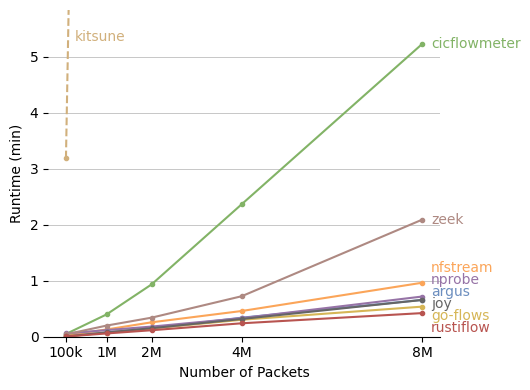

In [48]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(5.4, 4))
ax.yaxis.grid(True, linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

sizes = {
    'sample_100k': 100000,
    # 'sample_500k': 500000,
    'sample_1M': 1000000,
    'sample_2M': 2000000,
    'sample_4M': 4000000,
    'sample_8M': 8000000,
    # 'cicids2017': 50000000,
}
x_sizes = list(sizes.values())

label_offsets = {
    'cicflowmeter': 0,
    'zeek': 0,
    'nfstream': 16,
    'nprobe': 18,
    'argus': 8,
    'go-flows': -10,
    'rustiflow': -16,
    'joy': -4,
    'kitsune': 130,
}

for exporter in exporters:
    df = df_all[df_all['Extractor'] == exporter].groupby('PCAP File')['Runtime (s)'].mean()

    # Create a list of sizes and corresponding runtimes
    x_sizes_exporter = []
    y_runtimes = []
    for pcap in sizes.keys():
        if pcap in df.index:
            x_sizes_exporter.append(sizes[pcap])
            y_runtimes.append(df[pcap])

    if exporter == 'kitsune':
        # Plot kitsune using dashed line
        (line,) = ax.plot(
            x_sizes_exporter,
            y_runtimes,
            marker=".",
            linestyle="--",
            label=exporter,
            color=color_map[exporter],
        )
        # Add exporter name next to the first data point in the same color for kitsune
        ax.text(
            x_sizes_exporter[0] + 200000,
            y_runtimes[0] + label_offsets[exporter],
            exporter,
            color=line.get_color(),
            verticalalignment="center",
        )
    else:
        # Plot using sizes on the x-axis
        (line,) = ax.plot(
            x_sizes_exporter,
            y_runtimes,
            marker=".",
            linestyle="-",
            label=exporter,
            color=color_map[exporter],
        )
        # Add exporter name next to the last data point in the same color
        ax.text(
            x_sizes_exporter[-1] + 200000,
            y_runtimes[-1] + label_offsets[exporter],
            exporter,
            color=line.get_color(),
            verticalalignment="center",
        )

ax.set_ylim(0, 350)
ax.set_xticks(x_sizes)
ax.set_yticks([0, 60, 120, 180, 240, 300])
ax.set_xticklabels(['100k', '1M', '2M', '4M', '8M'])
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 60:.0f}'))
ax.set_xlabel('Number of Packets')
ax.set_ylabel('Runtime (min)')
# ax.legend()
plt.tight_layout()
# plt.savefig(f'{fig_dir}/runtime_vs_packets.pdf', bbox_inches='tight')
plt.show()

# Max memory for all exporters in function of pcap size

argus: PCAP File
cicids2017     1755.120312
sample_100k       8.764062
sample_1M       169.418750
sample_2M       169.918750
sample_4M       220.405469
sample_500k     136.309375
sample_8M       409.632031
Name: Max_Memory_Usage (MB), dtype: float64
cicflowmeter: PCAP File
sample_100k     381.594531
sample_1M       989.235937
sample_2M      1136.611719
sample_4M      1590.494531
sample_500k     856.276562
sample_8M      3671.567187
Name: Max_Memory_Usage (MB), dtype: float64
go-flows: PCAP File
cicids2017     215.446094
sample_100k      3.979687
sample_1M       84.305469
sample_2M       95.855469
sample_4M      106.065625
sample_500k     67.724219
sample_8M      134.314844
Name: Max_Memory_Usage (MB), dtype: float64
nfstream: PCAP File
cicids2017     1207.604687
sample_100k     746.935156
sample_1M       768.721875
sample_2M       775.609375
sample_4M       808.871094
sample_500k     764.353906
sample_8M       973.368750
Name: Max_Memory_Usage (MB), dtype: float64
nprobe: PCAP File
cic

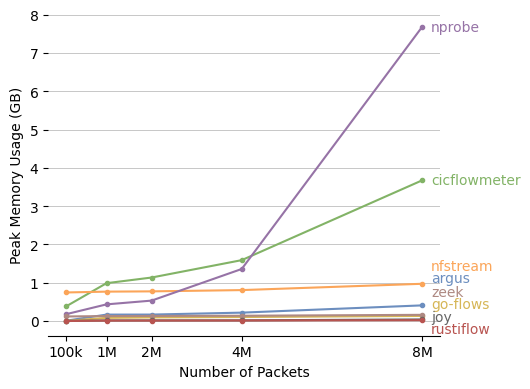

In [80]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(5.4, 4))
ax.yaxis.grid(True, linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

sizes = {
    "sample_100k": 100000,
    # 'sample_500k': 500000,
    "sample_1M": 1000000,
    "sample_2M": 2000000,
    "sample_4M": 4000000,
    "sample_8M": 8000000,
    # 'cicids2017': 50000000,
}
x_sizes = list(sizes.values())

label_offsets = {
    'cicflowmeter': 0,
    'zeek': 600,
    'nfstream': 450,
    'nprobe': -0,
    'argus': 700,
    'go-flows': 300,
    'rustiflow': -240,
    'joy': 50,
    'kitsune': 0,
}

for exporter in exporters:
    df = df_all[df_all['Extractor'] == exporter].groupby('PCAP File')['Max_Memory_Usage (MB)'].mean()

    print(f"{exporter}: {df}")
    if exporter == 'kitsune':
        continue
    # Create a list of sizes and corresponding runtimes
    x_sizes_exporter = []
    y_runtimes = []
    for pcap in sizes.keys():
        if pcap in df.index:
            x_sizes_exporter.append(sizes[pcap])
            y_runtimes.append(df[pcap])

    # Plot using sizes on the x-axis
    (line,) = ax.plot(
        x_sizes_exporter,
        y_runtimes,
        marker=".",
        linestyle="-",
        label=exporter,
        color=color_map[exporter],
    )
    # Add exporter name next to the last data point in the same color
    ax.text(
        x_sizes_exporter[-1] + 200000,
        y_runtimes[-1] + label_offsets[exporter],
        exporter,
        color=line.get_color(),
        verticalalignment="center",
    )

ax.set_xticks(x_sizes)
# ax.set_yticks([0, 60, 120, 180, 240, 300])
ax.set_xticklabels(['100k', '1M', '2M', '4M', '8M'])
# ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 60:.0f}'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1024:.0f}'))
ax.set_xlabel('Number of Packets')
ax.set_ylabel('Peak Memory Usage (GB)')
# ax.legend()
plt.tight_layout()
plt.savefig(f'{fig_dir}/mem_vs_packets.pdf', bbox_inches='tight')
plt.show()

# Cpu for all exporters in function of pcap size

argus: PCAP File
cicids2017     137.173008
sample_100k      0.000000
sample_1M       40.727333
sample_2M       43.695636
sample_4M       48.098429
sample_500k     14.460000
sample_8M       82.691980
Name: Avg_CPU_Usage (%), dtype: float64
cicflowmeter: PCAP File
sample_100k     209.723333
sample_1M       849.499155
sample_2M      1149.626368
sample_4M      1373.552420
sample_500k     520.645485
sample_8M      1397.256301
Name: Avg_CPU_Usage (%), dtype: float64
go-flows: PCAP File
cicids2017     209.775168
sample_100k      0.000000
sample_1M       73.356000
sample_2M       77.659556
sample_4M       82.552860
sample_500k     62.200000
sample_8M      107.938300
Name: Avg_CPU_Usage (%), dtype: float64
nfstream: PCAP File
cicids2017     958.756632
sample_100k    123.390000
sample_1M      600.678810
sample_2M      669.530143
sample_4M      751.071481
sample_500k    494.175000
sample_8M      816.911446
Name: Avg_CPU_Usage (%), dtype: float64
nprobe: PCAP File
cicids2017     87.522793
sample_1

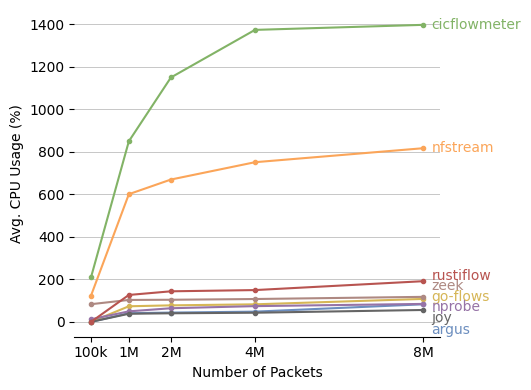

In [167]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(5.4, 4))
ax.yaxis.grid(True, linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

sizes = {
    "sample_100k": 100000,
    # 'sample_500k': 500000,
    "sample_1M": 1000000,
    "sample_2M": 2000000,
    "sample_4M": 4000000,
    "sample_8M": 8000000,
    # 'cicids2017': 50000000,
}
x_sizes = list(sizes.values())

label_offsets = {
    'cicflowmeter': 0,
    'zeek': 50,
    'nfstream': 0,
    'nprobe': -15,
    'argus': -120,
    'go-flows': 10,
    'rustiflow': 25,
    'joy': -40,
    'kitsune': 120,
}

for exporter in exporters:
    df = df_all[df_all['Extractor'] == exporter].groupby('PCAP File')['Avg_CPU_Usage (%)'].mean()

    print(f"{exporter}: {df}")
    if exporter == 'kitsune':
        continue
    # Create a list of sizes and corresponding runtimes
    x_sizes_exporter = []
    y_runtimes = []
    for pcap in sizes.keys():
        if pcap in df.index:
            x_sizes_exporter.append(sizes[pcap])
            y_runtimes.append(df[pcap])

    # Plot using sizes on the x-axis
    (line,) = ax.plot(
        x_sizes_exporter,
        y_runtimes,
        marker=".",
        linestyle="-",
        label=exporter,
        color=color_map[exporter],
    )
    # Add exporter name next to the last data point in the same color
    ax.text(
        x_sizes_exporter[-1] + 200000,
        y_runtimes[-1] + label_offsets[exporter],
        exporter,
        color=line.get_color(),
        verticalalignment="center",
    )

ax.set_xticks(x_sizes)
# ax.set_yticks([0, 60, 120, 180, 240, 300])
ax.set_xticklabels(['100k', '1M', '2M', '4M', '8M'])
# ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 60:.0f}'))
ax.set_xlabel('Number of Packets')
ax.set_ylabel('Avg. CPU Usage (%)')
# ax.legend()
plt.tight_layout()
plt.savefig(f'{fig_dir}/cpu_vs_packets.pdf', bbox_inches='tight')
plt.show()

# Runtime for all exporters in function of pcap size (zoomed)

argus: PCAP File
cicids2017     189.755957
sample_100k      0.700872
sample_1M        4.544342
sample_2M        8.822807
sample_4M       20.400195
sample_500k      2.385708
sample_8M       39.411879
Name: Runtime (s), dtype: float64
cicflowmeter: PCAP File
sample_100k      2.935835
sample_1M       23.857144
sample_2M       56.042343
sample_4M      141.923291
sample_500k     10.806304
sample_8M      313.408652
Name: Runtime (s), dtype: float64
go-flows: PCAP File
cicids2017     133.427693
sample_100k      0.284776
sample_1M        4.336168
sample_2M        8.844193
sample_4M       18.177744
sample_500k      1.918446
sample_8M       32.211089
Name: Runtime (s), dtype: float64
nfstream: PCAP File
cicids2017     364.418632
sample_100k      1.450336
sample_1M        7.751669
sample_2M       15.436237
sample_4M       27.549665
sample_500k      4.205963
sample_8M       57.799458
Name: Runtime (s), dtype: float64
nprobe: PCAP File
cicids2017     248.460639
sample_100k      3.517915
sample_1M  

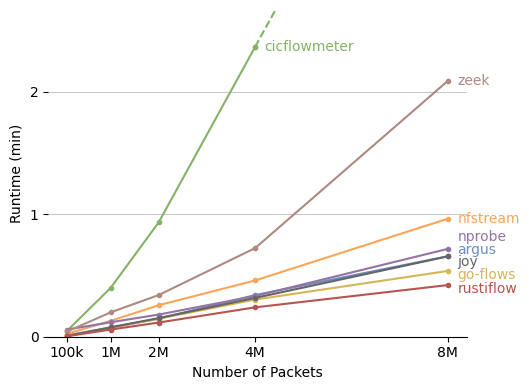

In [166]:
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(5.4, 4))
ax.yaxis.grid(True, linewidth=0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(True)

sizes = {
    "sample_100k": 100000,
    # 'sample_500k': 500000,
    "sample_1M": 1000000,
    "sample_2M": 2000000,
    "sample_4M": 4000000,
    "sample_8M": 8000000,
}
x_sizes = list(sizes.values())

label_offsets = {
    "cicflowmeter": 0,
    "zeek": 0,
    "nfstream": 0,
    "nprobe": 6,
    "argus": 3,
    "go-flows": -2,
    "rustiflow": -2,
    "joy": -3,
    "kitsune": 0,
}

for exporter in exporters:
    df = (
        df_all[df_all["Extractor"] == exporter]
        .groupby("PCAP File")["Runtime (s)"]
        .mean()
    )
    print(f"{exporter}: {df}")

    if exporter == "kitsune":
        continue

    # Create a list of sizes and corresponding runtimes
    x_sizes_exporter = []
    y_runtimes = []
    for pcap in sizes.keys():
        if pcap in df.index:
            x_sizes_exporter.append(sizes[pcap])
            y_runtimes.append(df[pcap])

    if exporter == "cicflowmeter":
        # Plot using sizes on the x-axis
        (line,) = ax.plot(
            x_sizes_exporter[:-1],
            y_runtimes[:-1],
            marker=".",
            linestyle="-",
            label=exporter,
            color=color_map[exporter],
        )
        # Plot using sizes on the x-axis
        (line,) = ax.plot(
            x_sizes_exporter[-2:],
            y_runtimes[-2:],
            marker=".",
            linestyle="--",
            label=exporter,
            color=line.get_color(),
        )
        # Add exporter name next to the last data point in the same color
        ax.text(
            x_sizes_exporter[-2] + 200000,
            y_runtimes[-2] + label_offsets[exporter],
            exporter,
            color=line.get_color(),
            verticalalignment="center",
        )
    elif exporter == "kitsune":
        # Plot kitsune using dashed line
        (line,) = ax.plot(
            x_sizes_exporter,
            y_runtimes,
            marker=".",
            linestyle="--",
            label=exporter,
            color=color_map[exporter],
        )
        # Add exporter name next to the first data point in the same color for kitsune
        ax.text(
            x_sizes_exporter[0] + 200000,
            y_runtimes[0] + label_offsets[exporter],
            exporter,
            color=line.get_color(),
            verticalalignment="center",
        )
    else:
        # Plot using sizes on the x-axis
        (line,) = ax.plot(
            x_sizes_exporter,
            y_runtimes,
            marker=".",
            linestyle="-",
            label=exporter,
            color=color_map[exporter],
        )
        # Add exporter name next to the last data point in the same color
        ax.text(
            x_sizes_exporter[-1] + 200000,
            y_runtimes[-1] + label_offsets[exporter],
            exporter,
            color=line.get_color(),
            verticalalignment="center",
        )

ax.set_xticks(x_sizes)
ax.set_xticklabels(["100k", "1M", "2M", "4M", "8M"])
ax.set_yticks([0, 60, 120])
ax.set_ylim(0, 160)
# ax.set_yticklabels(['0', '1', '2', '5'])
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x / 60:.0f}"))
ax.set_xlabel("Number of Packets")
ax.set_ylabel("Runtime (min)")
# ax.legend()
plt.tight_layout()
plt.savefig(f"{fig_dir}/runtime_vs_packets_zoom.pdf", bbox_inches="tight")
plt.show()

# Max memory for all exporters in function of the runtime

In [90]:
df_all.groupby(['Extractor', 'PCAP File'])[['Runtime (s)', 'Max_Memory_Usage (MB)']].mean()#.loc['cicids2017', 'Runtime (s)']

Runtime (s)  Max_Memory_Usage (MB)
Extractor    PCAP File                                      
argus        cicids2017    189.755957            1755.120312
             sample_100k     0.700872               8.764062
             sample_1M       4.544342             169.418750
             sample_2M       8.822807             169.918750
             sample_4M      20.400195             220.405469
             sample_500k     2.385708             136.309375
             sample_8M      39.411879             409.632031
cicflowmeter sample_100k     2.935835             381.594531
             sample_1M      23.857144             989.235937
             sample_2M      56.042343            1136.611719
             sample_4M     141.923291            1590.494531
             sample_500k    10.806304             856.276562
             sample_8M     313.408652            3671.567187
go-flows     cicids2017    133.427693             215.446094
             sample_100k     0.284776               3.979687
             sample_1M       4.336168              84.305469
             sample_2M       8.844193              95.855469
             sample_4M      18.177744             106.065625
             sample_500k     1.918446              67.724219
             sample_8M      32.211089             134.314844
joy          cicids2017    194.497823              99.092187
             sample_100k     0.352456               4.816406
             sample_1M       4.562698              17.535156
             sample_2M       9.125884              18.642969
             sample_4M      18.988736              19.221094
             sample_500k     2.128152              14.735156
             sample_8M      39.357889              43.175781
kitsune      sample_100k   191.070703             308.871875
             sample_1M    2610.784940            1503.708594
             sample_500k  1331.076646             812.021875
nfstream     cicids2017    364.418632            1207.604687
             sample_100k     1.450336             746.935156
             sample_1M       7.751669             768.721875
             sample_2M      15.436237             775.609375
             sample_4M      27.549665             808.871094
             sample_500k     4.205963             764.353906
             sample_8M      57.799458             973.368750
nprobe       cicids2017    248.460639           20169.372656
             sample_100k     3.517915             178.701562
             sample_1M       7.070614             436.262500
             sample_2M      10.856394             534.325000
             sample_4M      19.906342            1359.699219
             sample_500k     5.163336             379.339844
             sample_8M      43.022432            7673.137500
rustiflow    cicids2017    141.674028              46.514063
             sample_100k     0.266972               1.433594
             sample_1M       3.491947              12.139844
             sample_2M       6.948956              12.729688
             sample_4M      14.389322              14.627344
             sample_500k     1.572447              10.790625
             sample_8M      25.293689              22.988281
zeek         cicids2017   1000.165765             219.568750
             sample_100k     2.569161             120.389062
             sample_1M      11.922081             130.484375
             sample_2M      20.417800             133.649219
             sample_4M      43.387416             139.364062
             sample_500k     7.700167             125.849219
             sample_8M     125.311839             162.986719

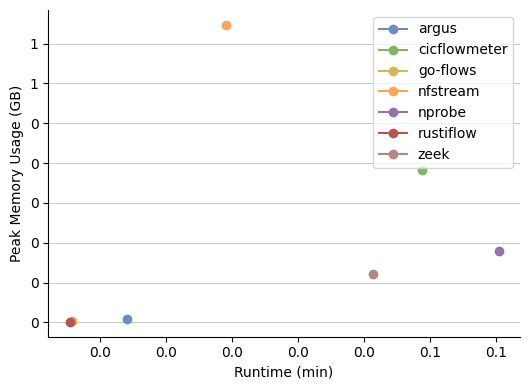

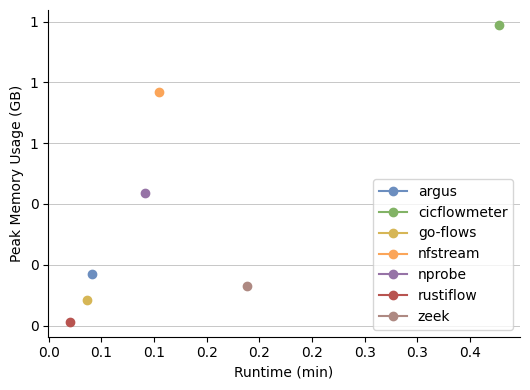

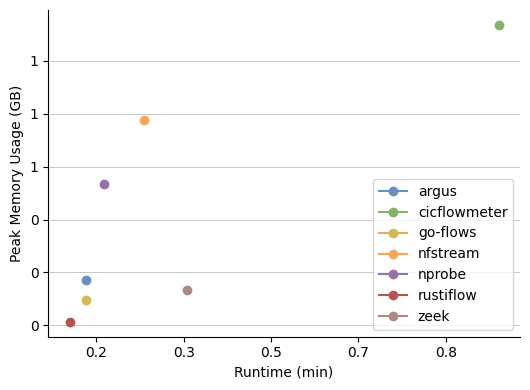

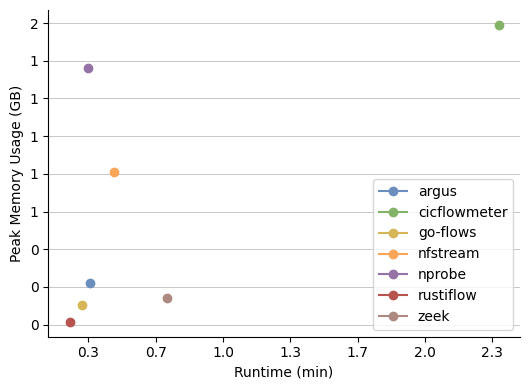

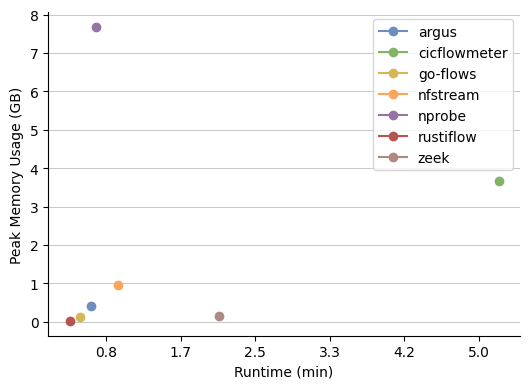

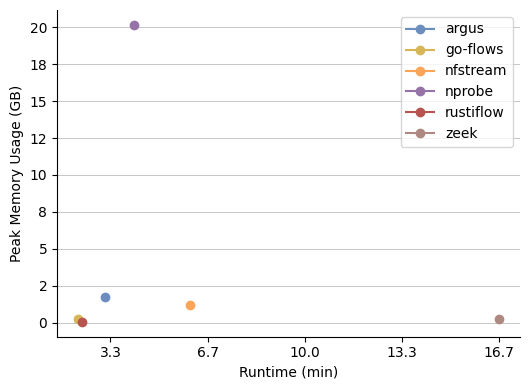

In [87]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=sns.color_palette(colors))

for pcap_file in ['sample_100k', 'sample_1M', 'sample_2M', 'sample_4M', 'sample_8M', 'cicids2017']:
    fig, ax = plt.subplots(figsize=(5.4, 4))
    ax.yaxis.grid(True, linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)

    for exporter in exporters:
        df = df_all[df_all['Extractor'] == exporter].groupby('PCAP File')[['Runtime (s)', 'Max_Memory_Usage (MB)']].mean()

        if pcap_file == 'cicids2017' and exporter == 'cicflowmeter':
            continue

        ax.plot(df.loc[pcap_file, 'Runtime (s)'], df.loc[pcap_file, 'Max_Memory_Usage (MB)'], marker='o', linestyle='-', label=exporter, color=color_map[exporter])

    # ax.set_xticks([0, 150, 300, 450, 600, 750, 900, 1050])
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 60:.1f}'))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1000:.0f}'))
    ax.set_xlabel('Runtime (min)')
    ax.set_ylabel('Peak Memory Usage (GB)')
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'{fig_dir}/mem_vs_runtime_{pcap_file}.pdf', bbox_inches='tight')
    plt.show()

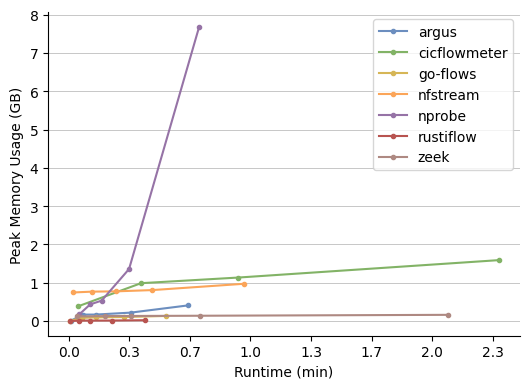

In [88]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=sns.color_palette(colors))

# for pcap_file in ['sample_100k', 'sample_1M', 'sample_2M', 'sample_4M', 'sample_8M', 'cicids2017']:
pcaps = ['sample_100k', 'sample_1M', 'sample_2M', 'sample_4M', 'sample_8M', 'cicids2017']
pcaps = ['sample_100k', 'sample_1M', 'sample_2M', 'sample_4M', 'sample_8M']

fig, ax = plt.subplots(figsize=(5.4, 4))
ax.yaxis.grid(True, linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

for exporter in exporters:
    df = df_all[df_all['Extractor'] == exporter].groupby('PCAP File')[['Runtime (s)', 'Max_Memory_Usage (MB)']].mean()

    if exporter == 'cicflowmeter':
        runtimes = [df.loc[pcap, 'Runtime (s)'] for pcap in pcaps[:-1]]
        mems = [df.loc[pcap, 'Max_Memory_Usage (MB)'] for pcap in pcaps[:-1]]
    else:
        runtimes = [df.loc[pcap, 'Runtime (s)'] for pcap in pcaps]
        mems = [df.loc[pcap, 'Max_Memory_Usage (MB)'] for pcap in pcaps]

    ax.plot(runtimes, mems, marker='.', linestyle='-', label=exporter, color=color_map[exporter])

# ax.set_xticks([0, 150, 300, 450, 600, 750, 900, 1050])
# ax.set_xlim(0, 60)
# ax.set_ylim(0, 1000)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 60:.1f}'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1000:.0f}'))
ax.set_xlabel('Runtime (min)')
ax.set_ylabel('Peak Memory Usage (GB)')
ax.legend()
plt.tight_layout()
# plt.savefig(f'{fig_dir}/mem_vs_runtime_{pcap_file}.pdf', bbox_inches='tight')
plt.show()

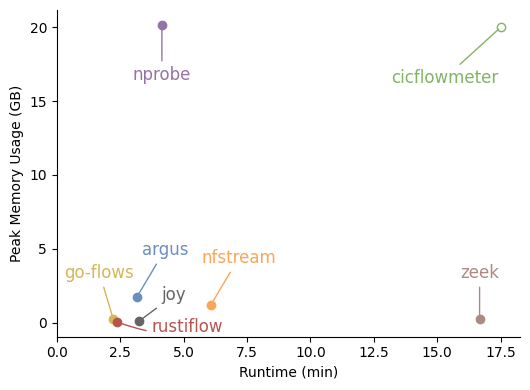

In [165]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=sns.color_palette(colors))
pcap_file = 'cicids2017'

fig, ax = plt.subplots(figsize=(5.4, 4))
# ax.yaxis.grid(True, linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

label_loc = {
    'cicflowmeter': (-40, -40),
    'zeek': (0, 30),
    'nfstream': (20, 30),
    'nprobe': (0, -40),
    'argus': (20, 30),
    'go-flows': (-10, 30),
    'rustiflow': (25, -10),
    'ntlflowlyzer': (0, 10),
    'joy': (25, 15),
}

for exporter in exporters:
    df = df_all[df_all['Extractor'] == exporter].groupby('PCAP File')[['Runtime (s)', 'Max_Memory_Usage (MB)']].mean()

    if pcap_file == 'cicids2017' and exporter == 'cicflowmeter':
        continue
    if exporter == 'kitsune':
        continue

    ax.plot(df.loc[pcap_file, 'Runtime (s)'], df.loc[pcap_file, 'Max_Memory_Usage (MB)'], marker='o', label=exporter, color=color_map[exporter])
    if exporter == 'rustiflow':
        ax.annotate(
            exporter,
            (
                df.loc[pcap_file, "Runtime (s)"],
                df.loc[pcap_file, "Max_Memory_Usage (MB)"],
            ),
            textcoords="offset points",
            xytext=label_loc[exporter],
            ha="left",
            va="bottom",
            color=color_map[exporter],
            arrowprops=dict(
                arrowstyle="-",
                color=color_map[exporter],
                connectionstyle="angle3,angleA=40,angleB=-20",
            ),
            size="large",
        )
    else:    
        ax.annotate(
            exporter,
            (
                df.loc[pcap_file, "Runtime (s)"],
                df.loc[pcap_file, "Max_Memory_Usage (MB)"],
            ),
            textcoords="offset points",
            xytext=label_loc[exporter],
            ha="center",
            color=color_map[exporter],
            arrowprops=dict(arrowstyle="-", color=color_map[exporter]),
            size="large",
        )

ax.plot(1050, 20000, marker='o', label='cicflowmeter', color=color_map['cicflowmeter'], mfc='none')
ax.annotate('cicflowmeter', (1050, 20000), textcoords="offset points", xytext=label_loc['cicflowmeter'], ha='center', color=color_map['cicflowmeter'], arrowprops=dict(arrowstyle='-', color=color_map['cicflowmeter']), size='large')


ax.set_xticks([0, 150, 300, 450, 600, 750, 900, 1050])
ax.set_yticks([0, 5000, 10000, 15000, 20000])
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 60:.1f}'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1000:.0f}'))

# ax.set_ylim(0, 20000)
ax.set_xlabel('Runtime (min)')
ax.set_ylabel('Peak Memory Usage (GB)')
# ax.legend()
plt.tight_layout()
plt.savefig(f'{fig_dir}/mem_vs_runtime_{pcap_file}.pdf', bbox_inches='tight')
plt.show()

# Color Experimentation

In [146]:
edge_colors = ["#3c618f", "#53833a", "#a28727", "#842628", "#674777", "#D79B00", "#666666"]
sns.color_palette(edge_colors)

[(0.23529411764705882, 0.3803921568627451, 0.5607843137254902),
 (0.3254901960784314, 0.5137254901960784, 0.22745098039215686),
 (0.6352941176470588, 0.5294117647058824, 0.15294117647058825),
 (0.5176470588235295, 0.14901960784313725, 0.1568627450980392),
 (0.403921568627451, 0.2784313725490196, 0.4666666666666667),
 (0.8431372549019608, 0.6078431372549019, 0.0),
 (0.4, 0.4, 0.4)]

In [184]:
colors = ["#6C8EBF", "#82B366", "#D6B656", "#B85450", "#9673A6", "#fba559", "#ae8982", "#e89fd2"]
sns.color_palette(colors)

[(0.4235294117647059, 0.5568627450980392, 0.7490196078431373),
 (0.5098039215686274, 0.7019607843137254, 0.4),
 (0.8392156862745098, 0.7137254901960784, 0.33725490196078434),
 (0.7215686274509804, 0.32941176470588235, 0.3137254901960784),
 (0.5882352941176471, 0.45098039215686275, 0.6509803921568628),
 (0.984313725490196, 0.6470588235294118, 0.34901960784313724),
 (0.6823529411764706, 0.5372549019607843, 0.5098039215686274),
 (0.9098039215686274, 0.6235294117647059, 0.8235294117647058)]

In [140]:
def get_color_palette(groups=[1, 1, 3, 3, 3], palette='tab10'):
    palette_all = sns.color_palette(palette, len(groups))
    palette_extended_all = []
    for base_color, n_elem in zip(palette_all, groups):
        shades = sns.light_palette(base_color, n_elem + 3)  # Sequential shades for each base color
        palette_extended_all.extend(shades[2:-1])  # Skip the lightest and darkest colors and add the rest
    return sns.color_palette(palette_extended_all)
get_color_palette([1, 1, 1, 1, 1, 1, 1])

[(0.39408824258654296, 0.6257672230097956, 0.7877349384588888),
 (0.9841039714811368, 0.6458134136044578, 0.3493722001601455),
 (0.42253365559849243, 0.7355270178445694, 0.42250381041024215),
 (0.8764892485964284, 0.41577487243100275, 0.4183526464241727),
 (0.7018869640907233, 0.5834925608983208, 0.8100467675611402),
 (0.6817295775858848, 0.5390234233312372, 0.5100168024566855),
 (0.9099427176361898, 0.6249211603598974, 0.8225918660182985)]

In [182]:
import matplotlib.colors as mcolors
mcolors.to_hex(get_color_palette([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])[6])

'#e89fd2'

In [163]:
sns.color_palette("muted")

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]